# Activity 2.2 - Transfer Learning 

#### Objective(s):

This activity aims to introduce how to apply transfer learning 

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural network 
* Demonstrate how to apply transfer learning in neural network


#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Set the parameters

In [2]:
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 50
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

Set how the input data is loaded

In [3]:

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

* Write a function to include all the training steps. 
* Use the model, training set, test set and number of classes as function parameters


In [4]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    return hist

In [5]:
def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='center right')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='center right')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

Shuffle and split the data between train and test sets

In [6]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Create two datasets 
* one with digits below 5
* one with 5 and above

In [7]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

* Define the feature layers that will used for transfer learning
* Freeze these layers during fine-tuning process

In [8]:


feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

Define the classification layers

In [9]:


classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

Create a model by combining the feature layers and classification layers

In [10]:

model = Sequential(feature_layers + classification_layers)

Check the model summary

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

 Train the  model on the digits 5,6,7,8,9

In [12]:
hist = train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/50
230/230 [==============================] - 6s 12ms/step - loss: 1.6114 - accuracy: 0.1930 - val_loss: 1.5971 - val_accuracy: 0.2584
Epoch 2/50
230/230 [==============================] - 2s 9ms/step - loss: 1.5954 - accuracy: 0.2438 - val_loss: 1.5791 - val_accuracy: 0.4207
Epoch 3/50
230/230 [==============================] - 2s 11ms/step - loss: 1.5778 - accuracy: 0.3102 - val_loss: 1.5595 - val_accuracy: 0.5489
Epoch 4/50
230/230 [==============================] - 2s 11ms/step - loss: 1.5591 - accuracy: 0.3686 - val_loss: 1.5369 - val_accuracy: 0.6285
Epoch 5/50
230/230 [==============================] - 2s 10ms/step - loss: 1.5374 - accuracy: 0.4282 - val_loss: 1.5106 - val_accuracy: 0.6688
Epoch 6/50
230/230 [==============================] - 2s 9ms/step - loss: 1.5117 - accuracy: 0.4799 - val_loss: 1.4791 - val_accuracy: 0.6957
Epoch 7/50
230/230 [==============================] - 2s 9ms/step - loss

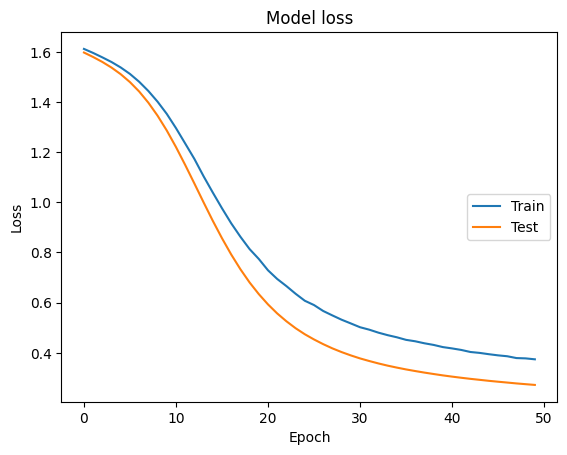

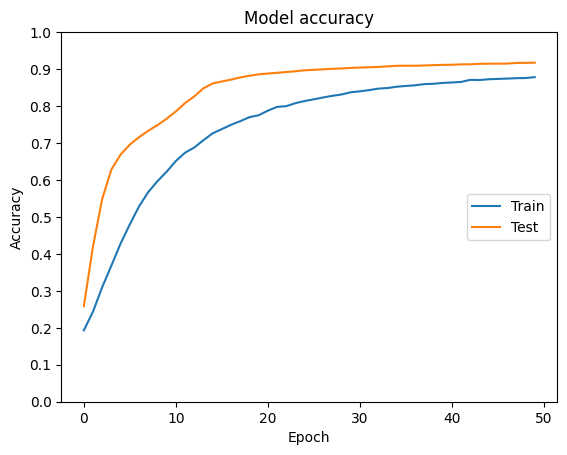

In [13]:
plot_training_history(hist)

Freeze only the feature layers

In [14]:

for l in feature_layers:
    l.trainable = False

Check again the summary and observe the parameters from the previous model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                        

Train again the model using the 0 to 4 digits

In [16]:
hist = train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/50
240/240 [==============================] - 2s 5ms/step - loss: 2.0588 - accuracy: 0.4118 - val_loss: 1.8030 - val_accuracy: 0.4201
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 1.7396 - accuracy: 0.4409 - val_loss: 1.5129 - val_accuracy: 0.4785
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 1.5079 - accuracy: 0.4850 - val_loss: 1.2920 - val_accuracy: 0.5386
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 1.3293 - accuracy: 0.5257 - val_loss: 1.1187 - val_accuracy: 0.5968
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 1.1718 - accuracy: 0.5749 - val_loss: 0.9787 - val_accuracy: 0.6501
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 1.0595 - accuracy: 0.6134 - val_loss: 0.8712 - val_accuracy: 0.6925
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 0.

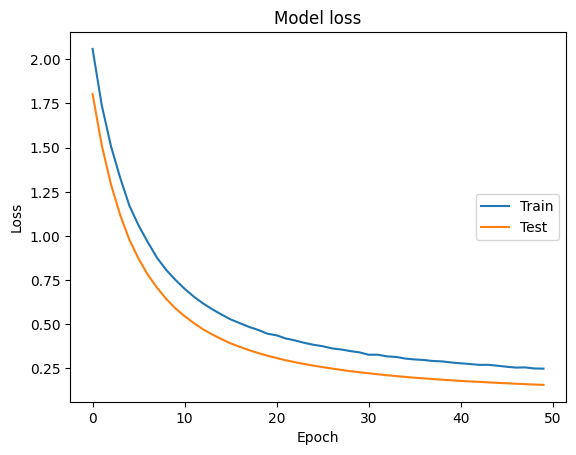

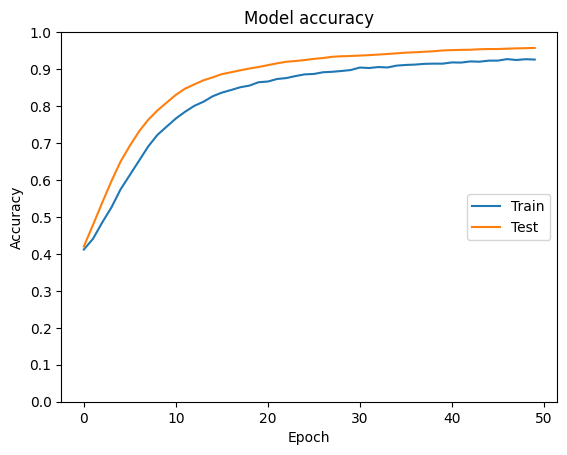

In [17]:
plot_training_history(hist)

#### Supplementary Activity
Now write code to reverse this training process. That is, you will train on the digits 0-4, and then finetune only the last layers on the digits 5-9.

In [26]:
feature_layers_supple = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [27]:
classification_layers_supple = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [28]:
model_supple = Sequential(feature_layers_supple + classification_layers_supple)

In [29]:
model_supple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [30]:
# Training model on 0-4 
hist_supple = train_model(model_supple,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/50
240/240 [==============================] - 3s 11ms/step - loss: 1.6034 - accuracy: 0.2238 - val_loss: 1.5640 - val_accuracy: 0.3979
Epoch 2/50
240/240 [==============================] - 2s 9ms/step - loss: 1.5536 - accuracy: 0.3196 - val_loss: 1.5098 - val_accuracy: 0.5943
Epoch 3/50
240/240 [==============================] - 2s 9ms/step - loss: 1.5007 - accuracy: 0.4200 - val_loss: 1.4497 - val_accuracy: 0.7346
Epoch 4/50
240/240 [==============================] - 2s 9ms/step - loss: 1.4433 - accuracy: 0.5126 - val_loss: 1.3814 - val_accuracy: 0.8255
Epoch 5/50
240/240 [==============================] - 2s 9ms/step - loss: 1.3766 - accuracy: 0.5984 - val_loss: 1.3019 - val_accuracy: 0.8733
Epoch 6/50
240/240 [==============================] - 2s 9ms/step - loss: 1.3000 - accuracy: 0.6639 - val_loss: 1.2099 - val_accuracy: 0.8984
Epoch 7/50
240/240 [==============================] - 2s 9ms/step - loss: 1

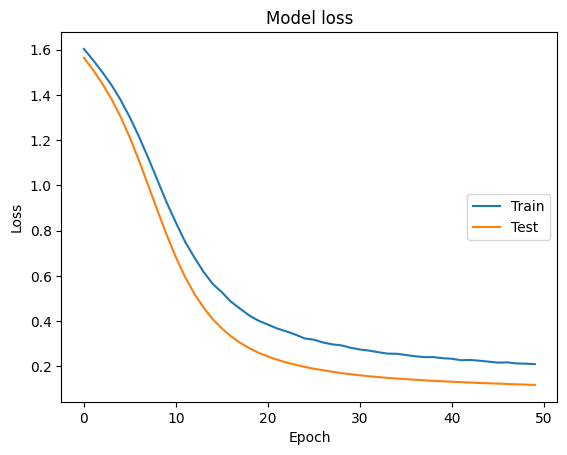

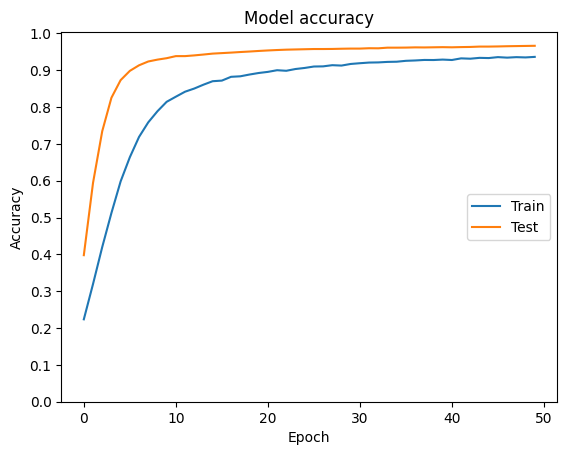

In [31]:
plot_training_history(hist_supple)

In [32]:

for l in feature_layers_supple:
    l.trainable = False

In [33]:
model_supple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [34]:
hist_supple = train_model(model_supple,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/50
230/230 [==============================] - 2s 5ms/step - loss: 2.7879 - accuracy: 0.3168 - val_loss: 2.4728 - val_accuracy: 0.3559
Epoch 2/50
230/230 [==============================] - 1s 4ms/step - loss: 2.3659 - accuracy: 0.3362 - val_loss: 2.0573 - val_accuracy: 0.3744
Epoch 3/50
230/230 [==============================] - 1s 4ms/step - loss: 2.0006 - accuracy: 0.3550 - val_loss: 1.7042 - val_accuracy: 0.4003
Epoch 4/50
230/230 [==============================] - 1s 4ms/step - loss: 1.7213 - accuracy: 0.3935 - val_loss: 1.4295 - val_accuracy: 0.4542
Epoch 5/50
230/230 [==============================] - 1s 4ms/step - loss: 1.4979 - accuracy: 0.4403 - val_loss: 1.2301 - val_accuracy: 0.5248
Epoch 6/50
230/230 [==============================] - 1s 5ms/step - loss: 1.3334 - accuracy: 0.4903 - val_loss: 1.0845 - val_accuracy: 0.5997
Epoch 7/50
230/230 [==============================] - 1s 4ms/step - loss: 1.

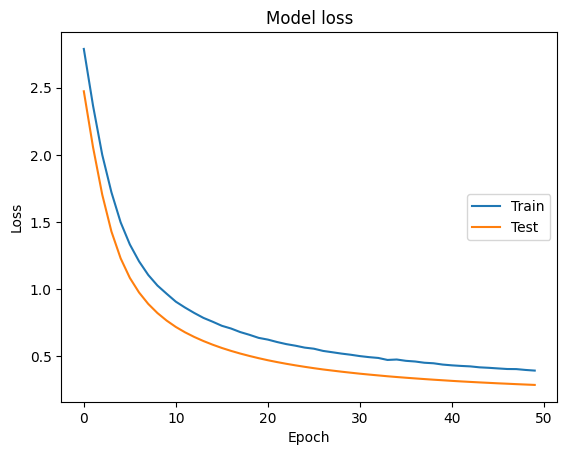

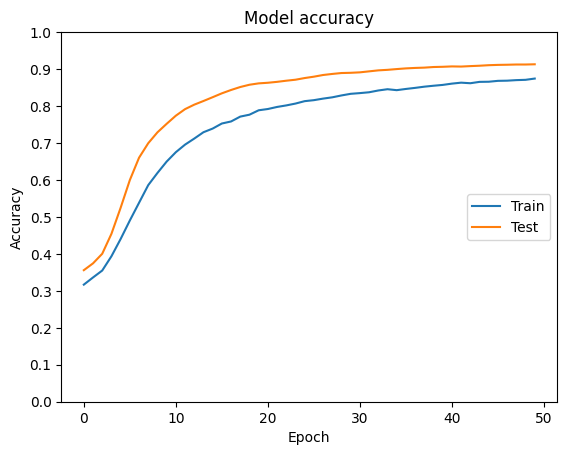

In [35]:
plot_training_history(hist_supple)

#### Conclusion

> In this activity, I learned how to build and train neural networs, and apply transfer learning to it. The way transfer learning works is, you have to split your dataset, in our case the 0-9 was splitted into two (0-4 and 5-9). The splitted data then trained individually where the first half (5-9) is the first one to be trained, and then the second half (0-4) was the last to be trained. The features of the first half of the data is used to the second half, resulting to a faster training. The supplementary activity just reversed the process, 0-4 on first half and 5-9 on second half.